In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import t
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp

In [105]:
df1 = pd.read_csv("20210706-20210713-WuKongBlessing.csv")
df2 = pd.read_csv("20210806-20210813-WuKongBlessing.csv")

In [103]:
print(df1.head())
print(df2.head())

           NickName        GameName  BetCount  ValidTurnover
0  0102011401@epwnc  WuKongBlessing        50           19.6
1  0102027387@epwnc  WuKongBlessing       134          327.4
2  0102032668@epwnc  WuKongBlessing        72          182.2
3  0102079785@epwnc  WuKongBlessing        56           20.6
4  0102553737@epwnc  WuKongBlessing         2            0.4
           NickName        GameName  BetCount  ValidTurnover
0  0102027387@epwnc  WuKongBlessing      1342         4969.8
1  0102224629@epwnc  WuKongBlessing        20            8.0
2  0102455625@epwnc  WuKongBlessing        99          345.0
3  0102553737@epwnc  WuKongBlessing       519          569.8
4  0102615991@epwnc  WuKongBlessing        46            9.2


In [106]:
print(df1.shape)
print(df2.shape)

(415, 4)
(410, 4)


In [92]:
df = pd.concat([df1,df2], axis=1, join='inner' )

In [69]:
df.columns = ['NickName', 'GameName', 
              'BetCount', 'ValidTurnover', 
              'NickName', 'GameName', 
              'BetCount_after', 'ValidTurnover_after']

In [70]:
df.head()

,NickName,GameName,BetCount,ValidTurnover,NickName,GameName,BetCount_after,ValidTurnover_after
0,0102011401@epwnc,WuKongBlessing,50,19.6,0102027387@epwnc,WuKongBlessing,1342,4969.8
1,0102027387@epwnc,WuKongBlessing,134,327.4,0102224629@epwnc,WuKongBlessing,20,8.0
2,0102032668@epwnc,WuKongBlessing,72,182.2,0102455625@epwnc,WuKongBlessing,99,345.0
3,0102079785@epwnc,WuKongBlessing,56,20.6,0102553737@epwnc,WuKongBlessing,519,569.8
4,0102553737@epwnc,WuKongBlessing,2,0.4,0102615991@epwnc,WuKongBlessing,46,9.2


In [71]:
df.shape

(410, 8)

In [72]:
df.describe()

,BetCount,ValidTurnover,BetCount_after,ValidTurnover_after
count,410.000000,410.000000,410.000000,410.000000
mean,228.914634,146.377561,262.080488,232.300000
std,417.188863,460.440981,458.833778,978.678845
min,1.000000,0.200000,1.000000,0.200000
25%,47.000000,16.050000,47.250000,13.250000
50%,106.000000,39.500000,109.000000,42.100000
75%,236.500000,106.850000,271.250000,129.150000
max,5655.000000,7414.400000,4190.000000,15280.000000


In [74]:
# calculate means
mean1, mean2 = np.mean(df['ValidTurnover']), np.mean(df['ValidTurnover_after'])
print(mean1)
print(mean2)

146.3775609756097
232.2999999999999


In [73]:
# calculate sample standard deviations
std1, std2 = np.std(df['ValidTurnover']), np.std(df['ValidTurnover_after'])

In [75]:
# calculate standard errors
n1, n2 = len(df1), len(df2)
se1, se2 = std1/np.sqrt(n1), std2/np.sqrt(n2)
print(se1)
print(se2)

22.574578400735927
48.27452376620876


In [76]:
# standard error on the difference between the samples
sed = np.sqrt(se1**2.0 + se2**2.0)
sed

53.292037255346386

[(0.0, 200.0)]

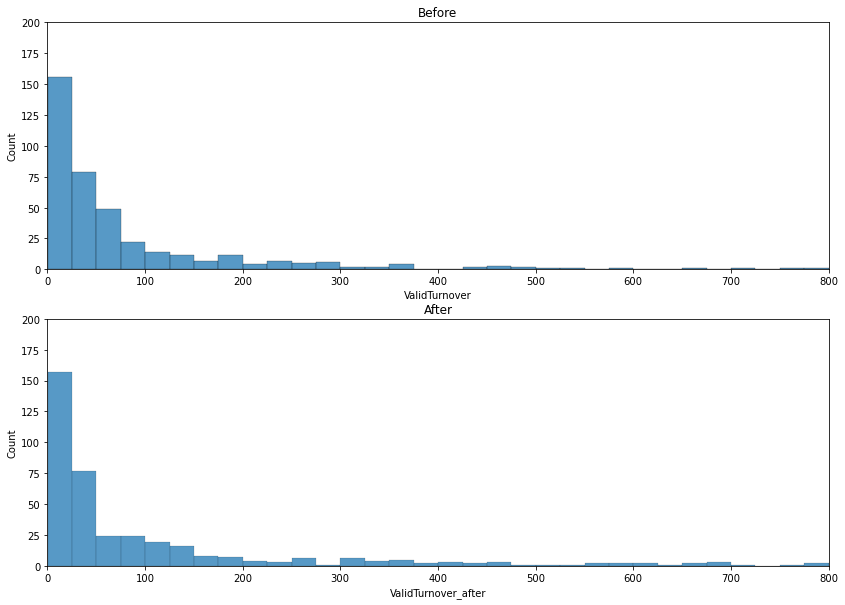

In [77]:
# histogram
fig, axs = plt.subplots(2,1 , figsize=(14, 10))

sns.histplot(data= df , x="ValidTurnover" , ax=axs[0],binwidth=25)
axs[0].set_title('Before')
axs[0].set(xlim=(0, 800))
axs[0].set(ylim=(0, 200))

sns.histplot(data= df , x="ValidTurnover_after" , ax=axs[1],binwidth=25)
axs[1].set_title('After')
axs[1].set(xlim=(0, 800))
axs[1].set(ylim=(0, 200))

[(0.0, 400.0)]

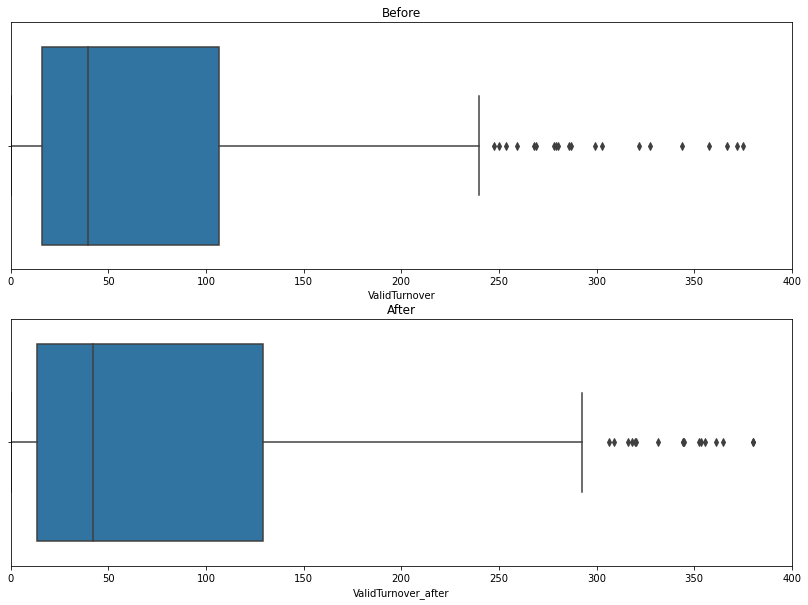

In [78]:
# boxplot
fig, axs = plt.subplots(2,1 , figsize=(14, 10))

sns.boxplot(data= df , x="ValidTurnover" , ax=axs[0])
axs[0].set_title('Before')
axs[0].set(xlim=(0, 400))

sns.boxplot(data= df , x="ValidTurnover_after" , ax=axs[1])
axs[1].set_title('After')
axs[1].set(xlim=(0, 400))

[(0.0, 800.0)]

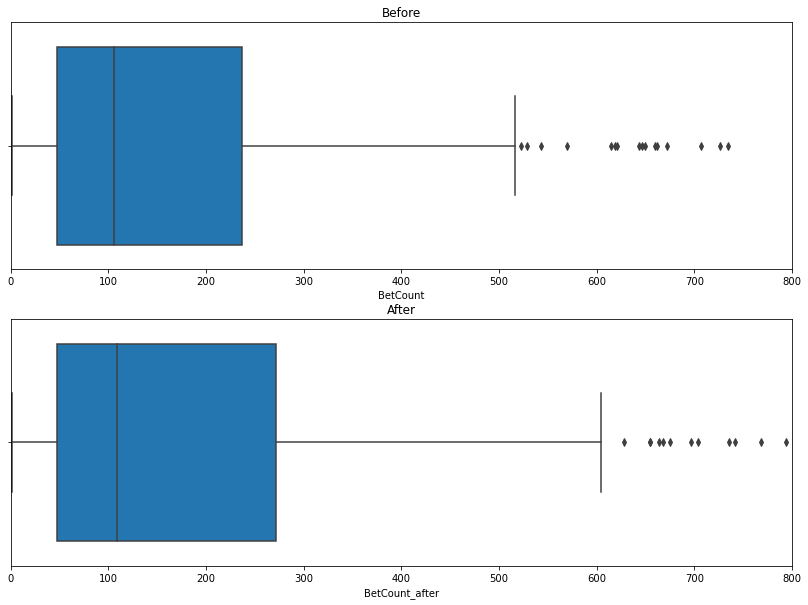

In [79]:
# boxplot
fig, axs = plt.subplots(2,1 , figsize=(14, 10))

sns.boxplot(data= df , x="BetCount" , ax=axs[0], saturation=.95)
axs[0].set_title('Before')
axs[0].set(xlim=(0, 800))

sns.boxplot(data= df , x="BetCount_after" , ax=axs[1], saturation=.95)
axs[1].set_title('After')
axs[1].set(xlim=(0, 800))

# Valid Turnover

In [80]:
summary, results = rp.ttest(group1 = df['ValidTurnover'], group1_name= "Before",
                            group2 = df['ValidTurnover_after'], group2_name= "After")

In [81]:
print(summary)

   Variable      N        Mean          SD         SE   95% Conf.    Interval
0    Before  410.0  146.377561  460.440981  22.739559  101.676566  191.078556
1     After  410.0  232.300000  978.678845  48.333503  137.286915  327.313085
2  combined  820.0  189.338780  765.534346  26.733619  136.864302  241.813259


In [82]:
print(results)

               Independent t-test   results
0  Difference (Before - After) =   -85.9224
1           Degrees of freedom =   818.0000
2                            t =    -1.6086
3        Two side test p value =     0.1081
4       Difference < 0 p value =     0.0540
5       Difference > 0 p value =     0.9460
6                    Cohen's d =    -0.1123
7                    Hedge's g =    -0.1122
8                Glass's delta =    -0.1866
9                  Pearson's r =     0.0562


In [83]:
# results
stats.ttest_ind( df['ValidTurnover'], df['ValidTurnover_after'])

Ttest_indResult(statistic=-1.6085676926864623, pvalue=0.10809675774439602)

In [84]:
# define alpha and degree of freedom
alpha = 0.95
dof = len(df1) - 1

# critical value
value = t.ppf(1-alpha/2, dof)
print(value)

0.0627448048898181


# BetCount / Spins

In [85]:
summary, results = rp.ttest(group1 = df['BetCount'], group1_name= "Before",
                            group2 = df['BetCount_after'], group2_name= "After")

In [86]:
print(summary)

   Variable      N        Mean          SD         SE   95% Conf.    Interval
0    Before  410.0  228.914634  417.188863  20.603489  188.412685  269.416584
1     After  410.0  262.080488  458.833778  22.660185  217.535525  306.625451
2  combined  820.0  245.497561  438.552207  15.314907  215.436469  275.558653


In [87]:
print(results)

               Independent t-test   results
0  Difference (Before - After) =   -33.1659
1           Degrees of freedom =   818.0000
2                            t =    -1.0829
3        Two side test p value =     0.2792
4       Difference < 0 p value =     0.1396
5       Difference > 0 p value =     0.8604
6                    Cohen's d =    -0.0756
7                    Hedge's g =    -0.0756
8                Glass's delta =    -0.0795
9                  Pearson's r =     0.0378


In [88]:
# results
stats.ttest_ind( df['BetCount'], df['BetCount_after'])

Ttest_indResult(statistic=-1.082910571313614, pvalue=0.2791672227054289)

In [89]:
# define alpha and degree of freedom
alpha = 0.95
dof = len(df1) - 1

# critical value
value = t.ppf(1-alpha/2, dof)
print(value)

0.0627448048898181
